# **`Wine Quality Prediction`**

# **`Objective`**

This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

In [ ]:
#import library
import pandas as pd
import numpy as np

In [ ]:
#importing CSV file
df = pd.read_csv('winequality-red.csv')


In [ ]:
# to get first five rows of dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#to get information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# for shape i.e No.of rows and columns
df.shape

(1599, 12)

In [ ]:
# Get unique values of variable Y
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [ ]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [ ]:
#Define Y(dependent) and X(independent) variables
x = df.drop(['quality'],axis=1)
y = df['quality']

In [ ]:
x.shape,y.shape


((1599, 11), (1599,))

In [ ]:
from re import S
from sklearn.preprocessing import StandardScaler
S_scaler = StandardScaler() # assining
x_scaled = S_scaler.fit_transform(x) # scled data
x_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [ ]:
#split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [ ]:
#importing libraries for Scaling which preprocesses the data
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 7, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5,
       6, 5, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 5, 7, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 6, 5,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score1 = accuracy_score(y_test,y_pred)
print(accuracy_score1)

0.603125


In [ ]:
y_pred.shape

(320,)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 99 31  0  0]
 [ 0  0 43 85  4  0]
 [ 0  0  1 32  9  0]
 [ 0  0  0  2  3  0]]


In [ ]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.76      0.70       130
           6       0.56      0.64      0.60       132
           7       0.56      0.21      0.31        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.30      0.27      0.27       320
weighted avg       0.57      0.60      0.57       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **`Prediction`**






In [ ]:
df_new = df.sample(1) #randomly selects a row from all data. using that row for prediction
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
753,8.3,0.65,0.1,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5


In [ ]:
x_new = df_new.drop(['quality'],axis=1)
x_new = S_scaler.fit_transform(x_new)

In [ ]:
y_pred1 = model.predict(x_new)
y_pred1

array([6])

In [ ]:
df_new2 = df.sample(1)
df_new2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
502,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.999,3.17,0.85,12.0,7


In [ ]:
x_new2 = df_new2.drop(['quality'],axis=1)
x_new2 = S_scaler.fit_transform(x_new2)

In [ ]:
y_pred2 = model.predict(x_new2)
y_pred2

array([6])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.603125


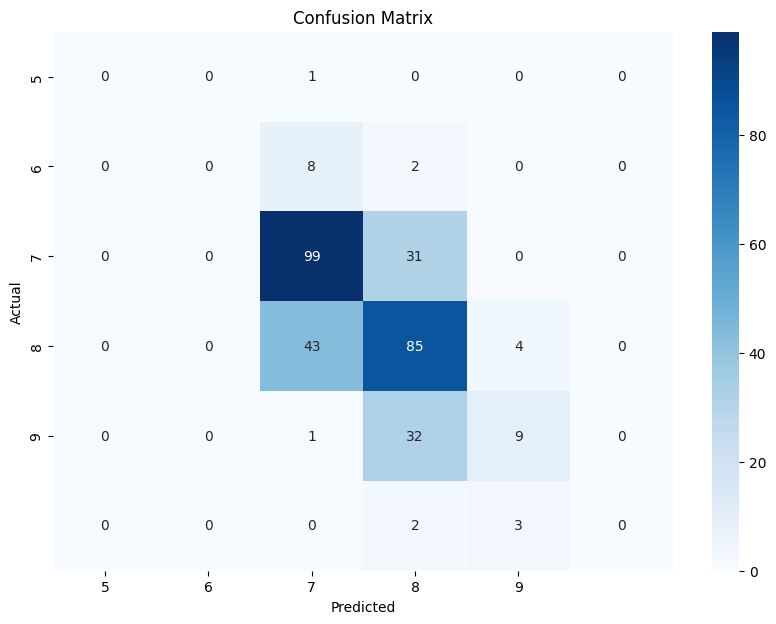

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[5, 6, 7, 8, 9], yticklabels=[5, 6, 7, 8, 9])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **`Overview and Explanation`**

I aimed to predict the quality of wine using a dataset obtained from Kaggle. The dataset includes various chemical properties of wine along with a quality rating. I utilized several machine learning techniques and libraries to build and evaluate my predictive model.

# **Libraries and Tools Used:**
**Pandas**: For data manipulation and analysis.
**NumPy**: For numerical operations.
**Scikit-learn(sklearn)**: For machine learning models and evaluation metrics.
**Matplotlib and Seaborn**: For data visualization.

**Dataset Acquisition**: The dataset from Kaggle provides a rich source of data for training and evaluating the model.

**Libraries**: Each library plays a specific role in data handling, model training, and visualization, making the process efficient and effective.

**Data Preprocessing**: Ensures that the data is clean and ready for modeling, which is crucial for accurate predictions.

**Splitting the Data**: Helps in evaluating the model’s performance on unseen data, ensuring that the model generalizes well.
Model Selection: SVC is a robust choice for classification tasks, especially with high-dimensional data.

**Model Evaluation**: Using confusion matrix and classification report provides a comprehensive view of the model’s performance, highlighting areas of strength and weakness.

**Prediction and Visualization**: Visualizing the results helps in interpreting the model’s performance and understanding its predictive capabilities.
